<a href="https://colab.research.google.com/github/Graceyong1020/ai_work3/blob/master/flower_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image # for image processing and loading
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os

from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
print(os.listdir('/content/gdrive/MyDrive/flower_photos'))

['flower_photos']


In [4]:
torch.manual_seed(777)
IMAGE_SIZE = 128 # 훈련 시키려면 이미지 크기를 통일 시켜야함. 128x128로 통일

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cude.manual_seed_all(777)

In [5]:
original_datasets=ImageFolder(root='/content/gdrive/MyDrive/flower_photos/',
                                transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()])) # 이미지 폴더에서 이미지를 불러옴

In [6]:
print(original_datasets) #Number of datapoints: 2313 -> 2313개의 이미지가 있음
# anti aliasing은 이미지를 축소할 때 이미지의 품질을 유지하기 위해 사용하는 기술

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: /content/gdrive/MyDrive/flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [7]:
original_loader=DataLoader(original_datasets,
                           batch_size=2313, # 2313 -> 전체 데이터를 한번에 불러옴
                           shuffle=True, # shuffle=False -> 데이터를 섞지 않음. 순서대로 불러옴
                            drop_last=False, # drop_last=False -> 데이터가 남아도 마지막 배치를 버리지 않음
                            num_workers=1) # num_workers=1 -> 데이터를 불러올 때 사용할 프로세스 수, 단일 프로세스 사용
# 이미지를 불러온 데이터셋을 DataLoader로 불러옴



In [8]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break

torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([0, 0, 0,  ..., 0, 0, 0])


In [9]:
# 이미지 로더로 불러온 이미지와 라벨을 추출 -> next(iter(데이터로더))
#total_batch=len(original_loader)
#print(total_batch)

#for i in range(total_batch):
original_images, labels = next(iter(original_loader)) # next(iter(데이터로더)) -> 데이터로더에서 데이터를 하나씩 batch_size만큼 불러옴
print(original_images.shape)
print(labels.shape)

torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [10]:
print(labels[:10])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [11]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

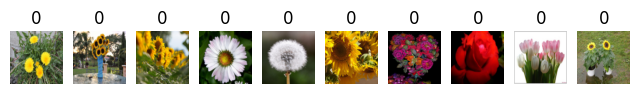

In [12]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0)) # permute -> 차원을 바꿔줌 -> 이미지는 (가로,세로,채널)로 되어있는데, (채널,가로,세로)로 바꿔줘야함
    plt.axis('off') # 축을 없앰
plt.show()

In [13]:
X1=original_images # 128 x 128 x 3 이미지 (가로,세로,채널)
Y1=labels
print(X.size(), Y.size())

torch.Size([2313, 3, 128, 128]) torch.Size([2313])


In [14]:
# 이미지 증강

Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE,IMAGE_SIZE)), # 이미지 중앙을 기준으로 이미지 크롭-> 이미지 크기를 128x128로 통일
    transforms.ToTensor()
])

In [17]:
transforms_dataset=ImageFolder(root='/content/gdrive/MyDrive/flower_photos/',
                                transform=Image_transform) # 이미지 폴더에서 이미지를 불러옴
transforms_loader=DataLoader(transforms_dataset,
                             batch_size=100,
                             shuffle=True,
                             num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [18]:
transforms_images, transforms_labels=next(iter(transforms_loader)) # image 100개를 불러옴

In [19]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0) # 이미지를 합침
Y2=torch.cat([Y1, transforms_labels], dim=0) # 라벨을 합침
print(X2.size(), Y2.size())

torch.Size([100, 3, 128, 128]) torch.Size([100])
torch.Size([2413, 3, 128, 128]) torch.Size([2413])


In [21]:
# image를 128x128로 크롭한 이미지를 출력


none_datasets=ImageFolder(root='/content/gdrive/MyDrive/flower_photos/',
                            transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()
                            ])) # 이미지 폴더에서 이미지를 불러옴

none_loader=DataLoader(none_datasets, batch_size=100, shuffle=False,
                          num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [22]:
none_images, none_labels=next(iter(none_loader))

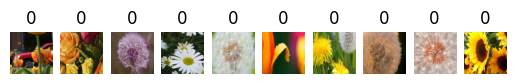

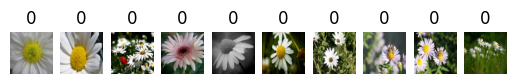

In [23]:
# 이미지 크기를 128x128로 통일한 이미지와 원본 이미지를 비교

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()



for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [27]:
def create_loader(transform):
    transforms_dataset=ImageFolder(root='/content/gdrive/MyDrive/flower_photos/',
                                transform=transform) # 이미지 폴더에서 이미지를 불러옴
    transforms_loader=DataLoader(transforms_dataset,
                                batch_size=1000,
                                shuffle=True,
                                num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

    transforms_images, labels=next(iter(transforms_loader)) # image 100개를 불러옴
    return transforms_images, labels

In [28]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                            contrast=(1,1),
                            saturation=(0.7,0.9),
                            #hue=(-0.2, 0.2) # 이미지의 밝기, 대비, 채도, 색조를 변경
                ),

    transforms.ToTensor()
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

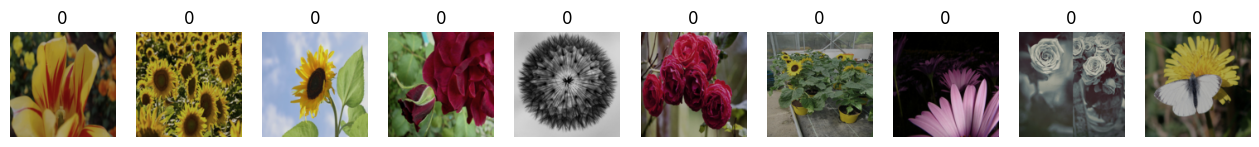

In [29]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [30]:
X3=torch.cat([X2, color_tf_images], dim=0) # 이미지를 합침
Y3=torch.cat([Y2, color_tf_labels], dim=0) # 라벨을 합침
print(X3.size(), Y3.size())

torch.Size([3413, 3, 128, 128]) torch.Size([3413])


In [31]:
# Define the transformations with horizontal flip
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.8),  # 이미지를 수평으로 뒤집음
    transforms.ToTensor()
])

flip_tf_images, flip_tf_labels=create_loader(Image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0) # 이미지를 합침
Y4=torch.cat([Y3, flip_tf_labels], dim=0) # 라벨을 합침
print(X4.size(), Y4.size())

torch.Size([4413, 3, 128, 128]) torch.Size([4413])


In [32]:
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.RandomRotation(degrees=(-15, 15), # 이미지를 -15도에서 15도 사이로 회전
                              interpolation=transforms.InterpolationMode.BILINEAR, fill=0), # 이미지를 회전할 때 보간법 사용
        transforms.ToTensor()
])
rot_tf_images, rot_tf_labels=create_loader(Image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0) # 이미지를 합침
Y5=torch.cat([Y4, rot_tf_labels], dim=0) # 라벨을 합침
print(X5.size(), Y5.size())

torch.Size([5413, 3, 128, 128]) torch.Size([5413])


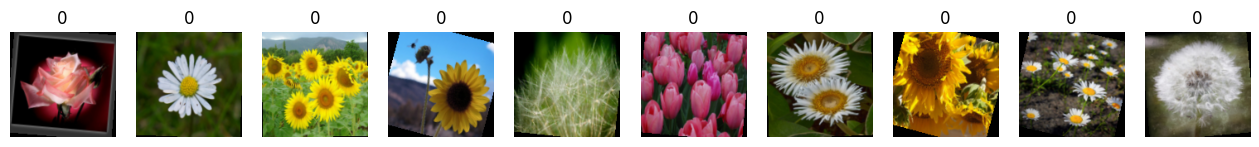

In [33]:
# Plot transformed images
plt.figure(figsize=(16, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1, 2, 0))
    plt.axis('off')
plt.show()

In [34]:
cnt0=(Y5==0).sum()
cnt1=(Y5==1).sum()
cnt2=(Y5==2).sum()
cnt3=(Y5==3).sum()
cnt4=(Y5==4).sum()
print(cnt0, cnt1, cnt2, cnt3, cnt4)

tensor(5413) tensor(0) tensor(0) tensor(0) tensor(0)


In [35]:
# 훈련 데이터셋과 테스트 데이터셋을 나눔

X=X5
Y=Y5
ratios=[0.8, 0.2] # 훈련 데이터셋과 테스트 데이터셋의 비율
print(Y.size())
train_cnt=int(X.size(0)*ratios[0]) # 훈련 데이터셋의 개수
test_cnt=int(X.size(0)*ratios[1]) # 테스트 데이터셋의 개수
cnts=[train_cnt, test_cnt]
print(test_cnt, train_cnt)

torch.Size([5413])
1082 4330


In [36]:
indices=torch.randperm(X.size(0)) # 데이터를 섞음
print(indices[:10])

tensor([5241, 1624, 4830, 3418, 1929, 2967, 4784, 1897,  148, 4006])


In [37]:

x=torch.index_select(X, dim=0, index=indices) # 데이터를 섞음
y=torch.index_select(Y, dim=0, index=indices) # 데이터를 섞음

x_train=x[:cnts[0]] # 훈련 데이터셋: ~ cnts[0]까지
x_test=x[cnts[0]:] # 테스트 데이터셋: ~ 끝까지
y_train=y[:cnts[0]] # 훈련 데이터셋: ~ cnts[0]까지
y_test=y[cnts[0]:] # 테스트 데이터셋: ~ 끝까지

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())


torch.Size([4330, 3, 128, 128]) torch.Size([4330])
torch.Size([1083, 3, 128, 128]) torch.Size([1083])


In [38]:
train_dataset=TensorDataset(x_train, y_train) # torchvision에 있는 TensorDataset을 사용하여 훈련 데이터셋을 생성
test_dataset=TensorDataset(x_test, y_test)

In [39]:
train_loader=DataLoader(train_dataset,
                        batch_size=100,
                        shuffle=True,
                        drop_last=False)
test_loader=DataLoader(test_dataset)

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # conv1: 입력(3, 128, 128)
        self.conv1=nn.Conv2d(
                   in_channels=3,
                   out_channels=8,
                     kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv2: 입력(8, 128, 128)
        self.conv2=nn.Conv2d(
                        in_channels=8,
                        out_channels=16,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv3: 입력(16, 64, 64)
        self.conv3=nn.Conv2d(
                        in_channels=16,
                        out_channels=32,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv4: 입력(32, 32, 32)
        self.conv4=nn.Conv2d(
                        in_channels=32,
                        out_channels=64,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )

        # conv5: 입력(64, 16, 16)
        self.conv5=nn.Conv2d(
                        in_channels=64,
                        out_channels=128,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )




        # maxpooling
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1=nn.Linear(128*4*4, 128) # fully connected layer. 128 설정 이유
        self.fc2=nn.Linear(128, 64)
        self.fc3=nn.Linear(64, 5) # 5개의 클래스로 분류

    def forward(self, x):
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) # (8, 64, 64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) # (16, 32, 32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) # (32, 16, 16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) # (64, 8, 8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) # (128, 4, 4)

        # 특징 추출
        x=x.view(-1, 128*4*4) # 128*4*4로 flatten. -1 -> batch size: 100
        #분류
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1) # softmax를 통해 확률값으로 변환
        return x



In [41]:
# 모델 생성
model = CNN().to(device)
print(model)
optimizer=torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer 사용
# CrossEntropyLoss: 다중 분류 손실 함수
criterion = nn.CrossEntropyLoss() # 손실 함수로 CrossEntropyLoss 사용

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [42]:
def train(epoch, model, train_loader, optimizer, interval): # interval: 100번째 배치마다 출력
    model.train() # 모델을 훈련 모드로 설정

    # 데이터로더에서 미니 배치를 하나씩 꺼내 학습
    # 1개의 배치 사이즈에 대해 학습
    for batch_index, (image, label) in enumerate(train_loader):
        image=image.to(device)
        label=label.to(device)

        optimizer.zero_grad()   # 기울기 초기화
        y_hat=model(image)     # 모델에 이미지를 입력하여 예측값을 계산
        loss=criterion(y_hat, label)
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        # interval마다 로스 출력
        if batch_index % interval == 0:
            print('train Epoch: {}, Train Loss:{}'.format(epoch, loss.item()))

In [43]:
def evaluate(model, test_loader):
    model.eval() # 모델을 평가 모드로 설정
    test_loss=0 # 테스트 손실
    correct=0 # 맞은 개수

    with torch.no_grad(): # 기울기 계산 비활성화
        for image, label in test_loader:
            image=image.to(device)
            label=label.to(device)
            y_hat=model(image) # 모델에 이미지를 입력하여 예측값을 계산
            test_loss+= criterion(y_hat, label).item() # 손실 계산
            pred=y_hat.argmax(dim=1) # 확률이 가장 높은 클래스 선택
            correct += (pred==label).sum()

    test_loss=test_loss/len(test_loader.dataset) # 테스트 손실
    test_accuracy=correct/len(test_loader.dataset)*100 # 테스트 정확도
    return test_loss, test_accuracy

# epoch만큼 반복하여 훈련


In [44]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0): # patience: 몇 번의 epoch동안 개선이 없을 때 학습을 멈출지 결정
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model): # 검증 손실이 감소할 때 모델을 저장
        '''Saves model when validation loss decrease.'''
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [46]:
# Initialize the early stopping object
early_stopping = EarlyStopping(patience=5, delta=0.01) # patience: 몇 번의 epoch를 기다릴지, delta: 개선되었다고 판단하기 위한 최소 변화량

epochs = 200
for epoch in range(1, epochs + 1):
    train(epoch,model, train_loader, optimizer, interval=100)  # model을 첫 번째 인수로 전달
    test_loss, test_accuracy = evaluate(model, test_loader)  # 테스트 데이터셋으로 모델 평가
    print('epoch: {}, test loss: {}, test accuracy: {}'.format(epoch, test_loss, test_accuracy))

    # Check early stopping condition
    early_stopping(test_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Load the last checkpoint with the best model
model.load_state_dict(torch.load('checkpoint.pt'))

train Epoch: 1, Train Loss:1.6220486164093018
epoch: 1, test loss: 0.9048323631286621, test accuracy: 100.0
train Epoch: 2, Train Loss:0.904832661151886
epoch: 2, test loss: 0.9048323631286621, test accuracy: 100.0
train Epoch: 3, Train Loss:0.904832661151886
epoch: 3, test loss: 0.9048323631286621, test accuracy: 100.0
train Epoch: 4, Train Loss:0.904832661151886
epoch: 4, test loss: 0.9048323631286621, test accuracy: 100.0
train Epoch: 5, Train Loss:0.904832661151886
epoch: 5, test loss: 0.9048323631286621, test accuracy: 100.0
train Epoch: 6, Train Loss:0.904832661151886
epoch: 6, test loss: 0.9048323631286621, test accuracy: 100.0
Early stopping


<ipython-input-46-ef1471c1c461>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('checkpoint.pt'))


<All keys matched successfully>

In [47]:
path='model.pt' # 모델 저장 경로
torch.save(model.state_dict(), path) # 모델 저장

In [48]:
model2 = CNN().to(device) # 모델 생성
model2.load_state_dict(torch.load(path)) # 저장한 모델 불러오기
model2.eval() # 모델을 평가 모드로 설정

<ipython-input-48-9a67ae2ef22d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(path)) # 저장한 모델 불러오기


CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [49]:
predict = model2(x_test[1].to(device)).argmax(dim=1) # 첫 번째 이미지 예측
print(predict.item(), y_test[1].item()) # 예측값과 실제값 출력

0 0


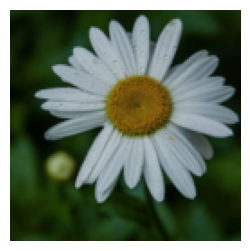

In [50]:
plt.figure(figsize=(3, 3))
# permute로 이미지의 shape을 (가로, 세로, 채널)에서 (채널, 가로, 세로)로 변경
# (height, width, channel)
plt.imshow(x_test[1].permute(1, 2, 0)) # 이미지 출력
plt.axis('off')
plt.show()